In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [24]:
df.shape

(48895, 16)

In [25]:
df.duplicated().sum()


0

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [28]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [29]:
df.drop(["name","id","host_name","last_review"],axis=1,inplace=True)

In [30]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [31]:
df.fillna({"reviews_per_month":0},inplace=True)

In [32]:
df.reviews_per_month.isnull().sum()

0

In [33]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,1.090910e+00,1.597283e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [36]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [43]:
corr = df.corr(method="kendall")
corr

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.033103,0.074113,-0.049696,-0.093476,-0.088893,0.072355,0.112193,0.120790
latitude,0.033103,1.000000,0.036699,0.090532,0.016805,-0.030714,-0.029692,0.001361,-0.005180
longitude,0.074113,0.036699,1.000000,-0.302361,-0.086497,0.055079,0.075880,0.050607,0.048909
price,-0.049696,0.090532,-0.302361,1.000000,0.074233,-0.037926,-0.041318,-0.085327,0.061053
minimum_nights,-0.093476,0.016805,-0.086497,0.074233,1.000000,-0.132916,-0.190851,0.047818,0.056693
number_of_reviews,-0.088893,-0.030714,0.055079,-0.037926,-0.132916,1.000000,0.695342,0.044516,0.174963
reviews_per_month,0.072355,-0.029692,0.075880,-0.041318,-0.190851,0.695342,1.000000,0.075523,0.214517
calculated_host_listings_count,0.112193,0.001361,0.050607,-0.085327,0.047818,0.044516,0.075523,1.000000,0.330602
availability_365,0.120790,-0.005180,0.048909,0.061053,0.056693,0.174963,0.214517,0.330602,1.000000


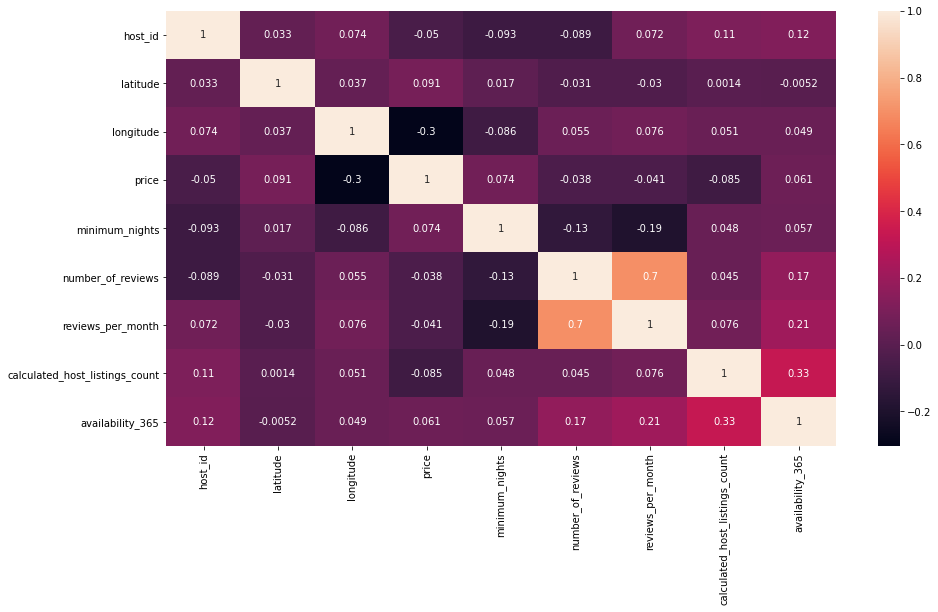

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [46]:
df.shape

(48895, 12)

In [47]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

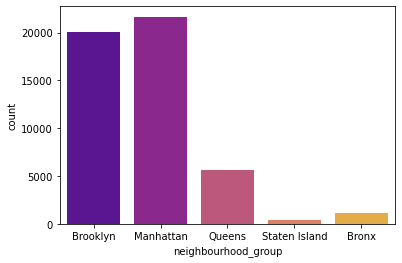

In [48]:
sns.countplot(df['neighbourhood_group'],palette="plasma")

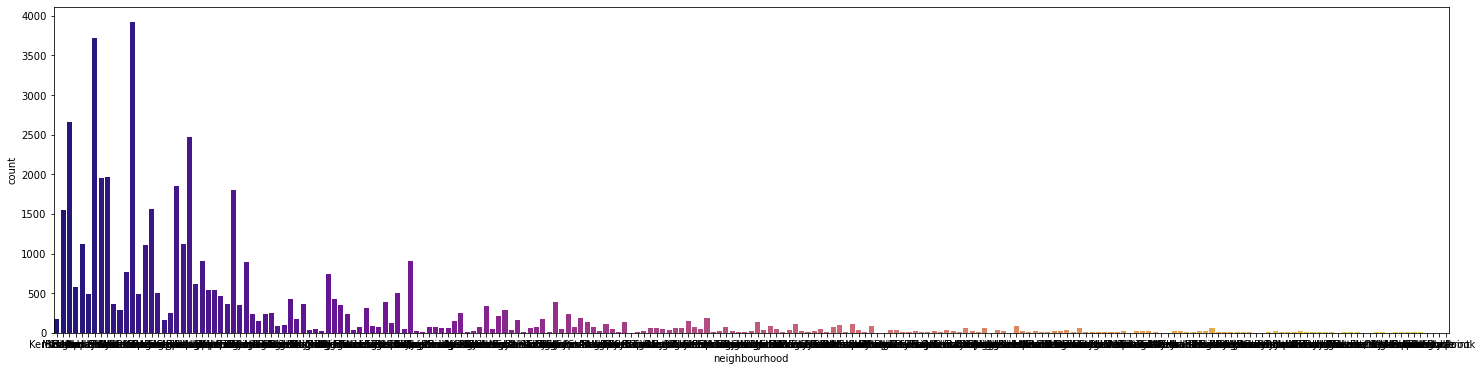

In [49]:
plt.subplots(figsize=(25,6))
sns.countplot(df['neighbourhood'], palette="plasma")

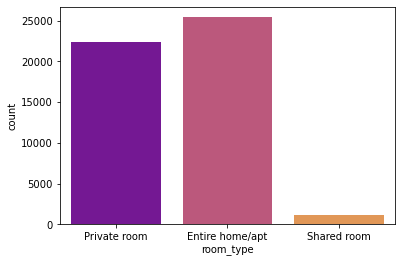

In [50]:
sns.countplot(df['room_type'], palette="plasma")

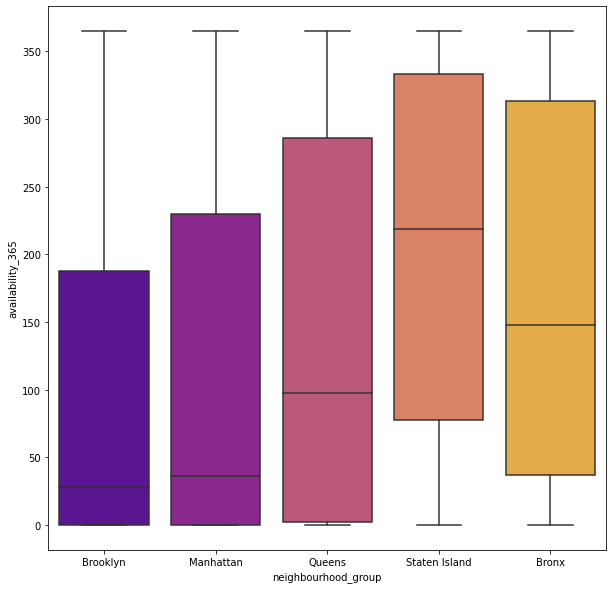

In [52]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='neighbourhood_group',y='availability_365',palette="plasma")

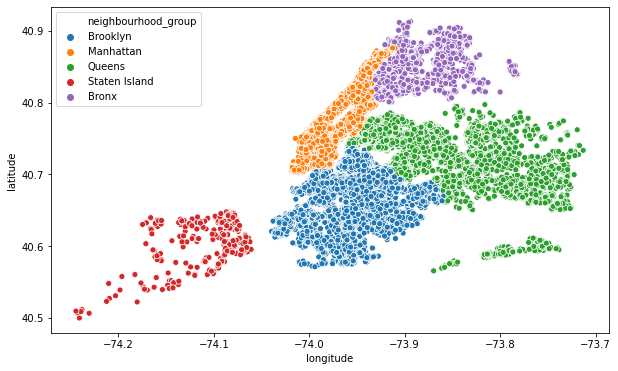

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)

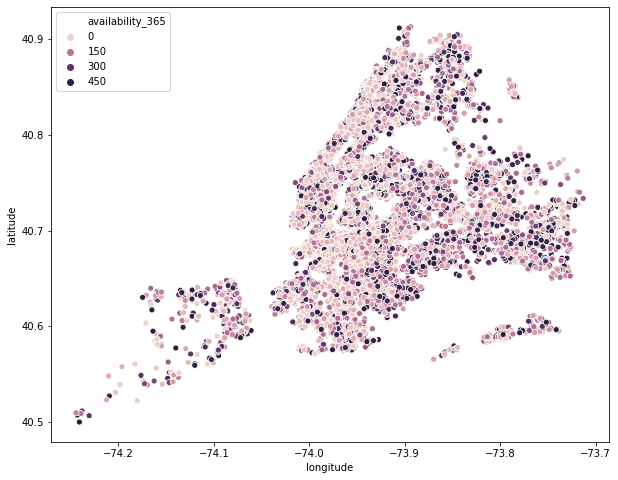

In [56]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)

## Model Building

In [57]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
df.drop(["host_id","neighbourhood","longitude","latitude","number_of_reviews","reviews_per_month"],axis=1,inplace=True)


In [64]:
df.head(10)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0
5,Manhattan,Entire home/apt,200,3,1,129
6,Brooklyn,Private room,60,45,1,0
7,Manhattan,Private room,79,2,1,220
8,Manhattan,Private room,79,2,1,0
9,Manhattan,Entire home/apt,150,1,4,188


In [61]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [62]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Feature Engineering

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["neighbourhood_group"] = le.fit_transform(df["neighbourhood_group"])
df["room_type"] = le.fit_transform(df["room_type"])
df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,1,1,149,1,6,365
1,2,0,225,1,2,355
2,2,1,150,3,1,365
3,1,0,89,1,1,194
4,2,0,80,10,1,0


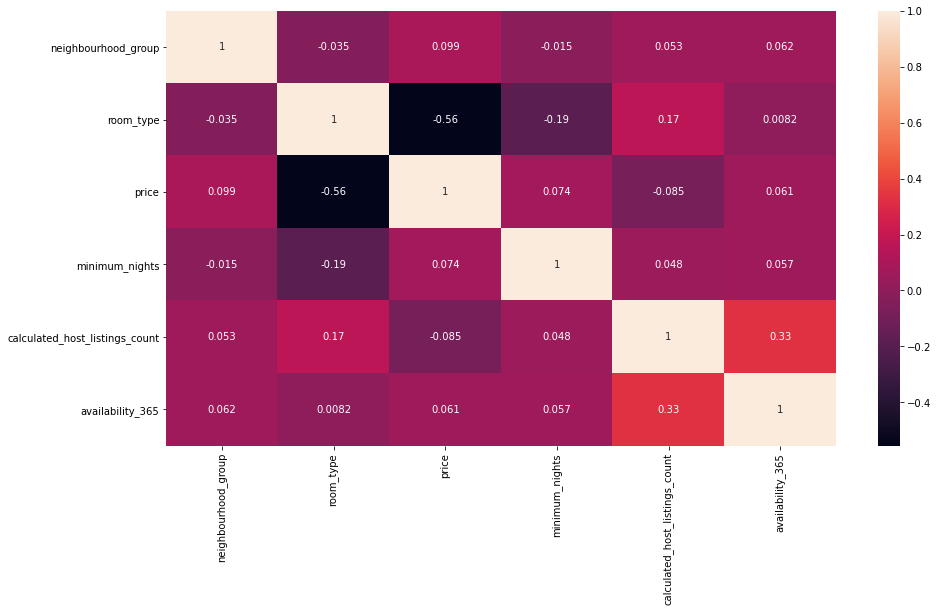

In [68]:
plt.figure(figsize=(15,8))
corr = df.corr(method="kendall")
sns.heatmap(corr,annot=True)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [71]:
y = df.pop("price")
X = df

In [74]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [75]:
X

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,1,1,1,6,365
1,2,0,1,2,355
2,2,1,3,1,365
3,1,0,1,1,194
4,2,0,10,1,0
...,...,...,...,...,...
48890,1,1,2,2,9
48891,1,1,4,2,36
48892,2,0,10,1,27
48893,2,2,1,6,2


In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

## Linear Regression 

In [77]:
lg = LinearRegression()
lg.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred = lg.predict(X_test)
y_pred

array([208.07960469, 122.3115934 ,  94.58603858, ..., 200.92008843,
        95.72575777, 203.73210166])

In [81]:
r2_score(y_test,y_pred)

0.07970907347239364

## Decision Tree

In [82]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
dt = DecisionTreeRegressor(min_samples_leaf=.0001)

In [83]:
dt.fit(X_train,y_train)
y_predict = dt.predict(X_test)
y_predict


array([154.25      ,  97.75      ,  96.63300493, ...,  55.2       ,
       198.62048193, 141.71428571])

In [84]:
r2_score(y_test,y_predict)

0.12184202701241131